# Projeto 1 

O projeto tem o objetivo de classificar os vinhos entre vermelho e branco.

In [68]:
#--- Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display = "diagram")

#--- Configurações adicionais

plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option('display.max_columns', None)

## 1. Concatenando os bancos de dados

In [37]:
banco_red = pd.read_csv("data/winequality-red.csv", sep = ";")
banco_white = pd.read_csv("data/winequality-white.csv", sep = ";")

banco_red["classification"] = "Red"
banco_white["classification"] = "White"

banco = pd.concat([banco_red, banco_white], axis = 0).reset_index(drop = True)

f"O dataset possui {banco.shape[0]} observações e {banco.shape[1]} variáveis"

'O dataset possui 6497 observações e 13 variáveis'

In [38]:
banco.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


## 2. Pré-processamento simples

In [54]:
def binarizacao(df):
    
    df = df.copy()
    
    df["classification"] = df["classification"].apply(lambda x: 0 if "Red" else 1)
    
    return(df)

In [57]:
final_banco = (
    banco
    .pipe(binarizacao)
)

final_banco.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [65]:
numeric_features = ["fixed acidity", "volatile acidity", "citric acid, residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

In [60]:
stand = StandardScaler()
logistic = LogisticRegression(n_jobs = -1, random_state = 1234)

In [69]:
skl_pipeline = make_pipeline(stand, logistic)
skl_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(n_jobs=-1, random_state=1234))])

# Fazer o functiontransformer

In [ ]:
FunctionTransformer

## 2. Baseline

In [ ]:
x = banco.drop("went_on_backorder", axis = 1)
y = banco["went_on_backorder"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size = 0.7, random_state = 1234, stratify = y)

## 2. Análise Exploratória

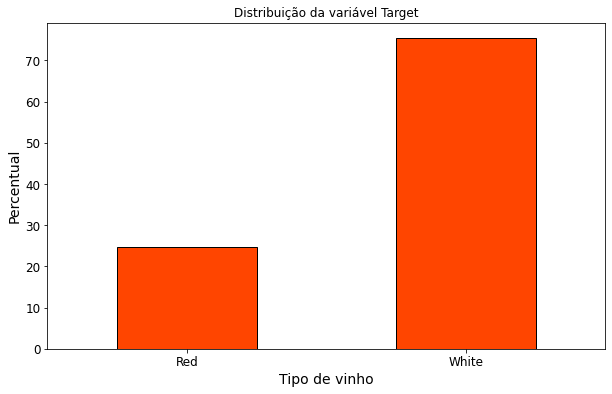

In [4]:
plt.figure(figsize = [10, 6])

banco["classification"].value_counts(normalize = True).mul(100).round(2).sort_values().plot(kind = "bar", color = "orangered", edgecolor = "black")

plt.title(label = "Distribuição da variável Target")
plt.xlabel("Tipo de vinho", fontsize = 14, color = "black")
plt.ylabel("Percentual", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)
plt.show()

In [5]:
banco.drop(["classification", "quality"], axis = 1).describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.22,1.30,3.80,6.40,7.00,7.70,15.90
volatile acidity,6497.0,0.34,0.16,0.08,0.23,0.29,0.40,1.58
citric acid,6497.0,0.32,0.15,0.00,0.25,0.31,0.39,1.66
residual sugar,6497.0,5.44,4.76,0.60,1.80,3.00,8.10,65.80
chlorides,6497.0,0.06,0.04,0.01,0.04,0.05,0.06,0.61
free sulfur dioxide,6497.0,30.53,17.75,1.00,17.00,29.00,41.00,289.00
total sulfur dioxide,6497.0,115.74,56.52,6.00,77.00,118.00,156.00,440.00
density,6497.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,6497.0,3.22,0.16,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,0.53,0.15,0.22,0.43,0.51,0.60,2.00


- As variáveis que mais possuem valores medianos próximos entre as duas classes, na qual o modelo provavelmente indicará alguma possível igualdade entre elas, são:

    - volatily acidity;
    - citric acid;
    - chlorides;
    - density
    - pH
    - sulphates
    - alcohol

In [6]:
banco.drop("quality", axis = 1).groupby("classification").aggregate(["median", "std"]).T.round(2)

classification                 Red   White
fixed acidity        median   7.90    6.80
                     std      1.74    0.84
volatile acidity     median   0.52    0.26
                     std      0.18    0.10
citric acid          median   0.26    0.32
                     std      0.19    0.12
residual sugar       median   2.20    5.20
                     std      1.41    5.07
chlorides            median   0.08    0.04
                     std      0.05    0.02
free sulfur dioxide  median  14.00   34.00
                     std     10.46   17.01
total sulfur dioxide median  38.00  134.00
                     std     32.90   42.50
density              median   1.00    0.99
                     std      0.00    0.00
pH                   median   3.31    3.18
                     std      0.15    0.15
sulphates            median   0.62    0.47
                     std      0.17    0.11
alcohol              median  10.20   10.40
                     std      1.07    1.23

- O gráfico abaixo nos mostra as densidades por vinho (Red e White) de cada variável;

- É problemático se ambos os vinhos possuem o mesmo padrão;

- As únicas variáveis que continuam sendo problemáticas ainda neste cenário são:

    - chlorides
    - free sulfur dioxide
    - ph
    - sulphates 
    - alcohol 

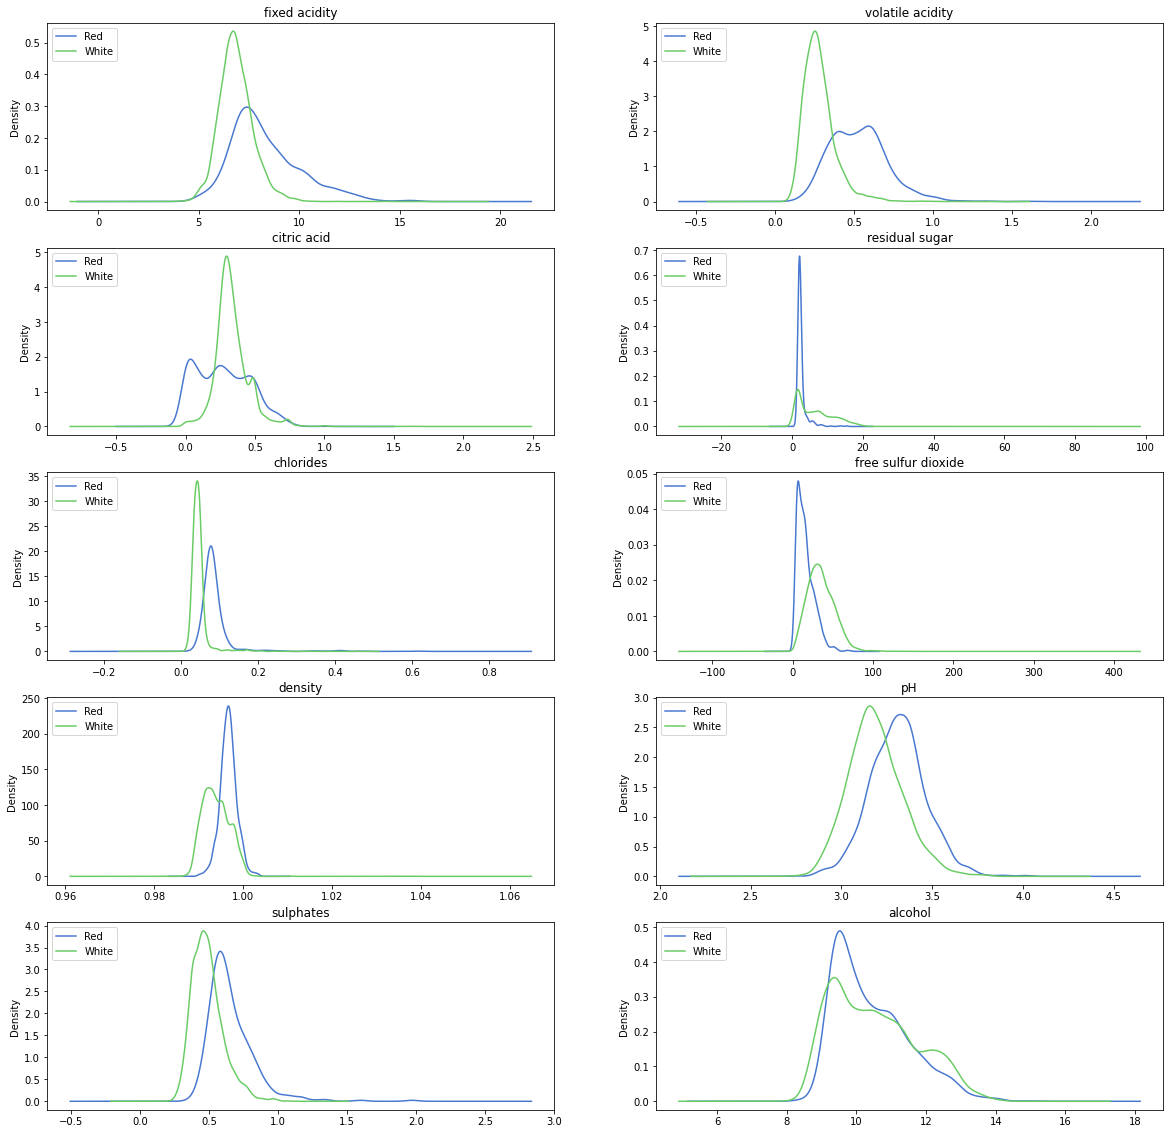

In [7]:
banco_quality_wo = banco.drop(["total sulfur dioxide", "quality"], axis = 1)

f, axes = plt.subplots(5, 2, figsize = (20, 20), sharex = False)

for ax, column in zip(axes.flat, banco_quality_wo.columns):
    banco_quality_wo.groupby("classification")[column].plot(kind = "kde", ax = ax)
    ax.legend(loc = "upper left")
    ax.set_title(column)
    
f.show()

- As únicas relações preocupantes, dado o coeficiente de correlação de Pearson, são a **total_sulfur_dioxide** com a **free_sulfur_dioxide** e o **ph** com o **alcohol**

- Alguns autores na literatura mencionam correlação acima de 0.9 ou abaixo de -0.9 para indicar multicolineariedade.

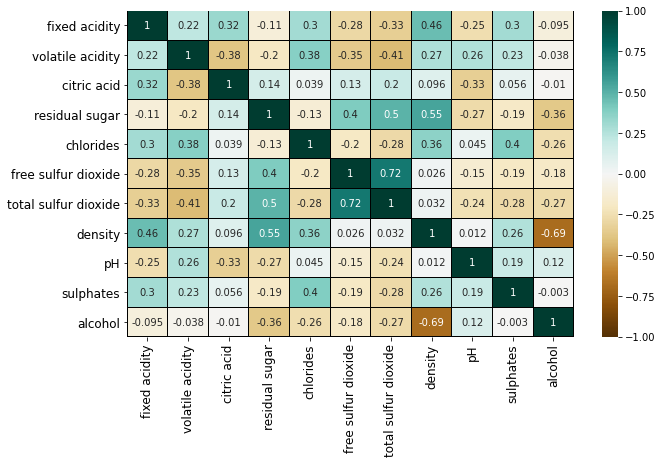

In [8]:
corr_var_quant = banco.drop(["classification", "quality"], axis = 1).corr()

plt.figure(figsize = [10, 6])
sns.heatmap(data = corr_var_quant, vmin = -1, vmax = 1, linewidths = 0.01, linecolor = "black", cmap = "BrBG", annot = True)
plt.xlabel("", fontsize = 14, color = "black")
plt.ylabel("", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

In [9]:
banco["quality"].value_counts(normalize = True).mul(100).round(2)

6    43.65
5    32.91
7    16.61
4     3.32
8     2.97
3     0.46
9     0.08
Name: quality, dtype: float64

## 2. Clusterização

In [10]:
# Padronizando os dados

banco_quant = banco.drop(["quality", "classification"], axis = 1)
var_quant = list(banco_quant.columns)

scaler = StandardScaler()

banco_quant[var_quant] = scaler.fit_transform(banco_quant[var_quant])
banco_quant.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


In [11]:
# Redução de dimensionalidade com PCA

from sklearn.decomposition import PCA

model_pca = PCA(n_components = 2).fit(banco_quant)

banco_pca = model_pca.transform(banco_quant)

banco_pca

array([[-3.20599617,  0.41652332],
       [-3.03905081,  1.10746213],
       [-3.07189347,  0.87896444],
       ...,
       [ 0.5711325 , -0.72266165],
       [ 0.09005243, -3.54577991],
       [ 0.51257566, -2.89104008]])

In [12]:
kmeans = KMeans(n_clusters = 3, init = "random")

kmeans.fit(banco_pca)

KMeans(init='random', n_clusters=3)

In [13]:
df_plot_km = pd.concat([banco.reset_index(drop = True), 
                        pd.DataFrame(banco_pca, columns = ["PC1", "PC2"]), 
                        pd.DataFrame(kmeans.labels_, columns = ["Cluster"])], axis = 1)

df_plot_km.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification,PC1,PC2,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,-3.205996,0.416523,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,-3.039051,1.107462,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,-3.071893,0.878964,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,-1.571262,2.112545,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,-3.205996,0.416523,0


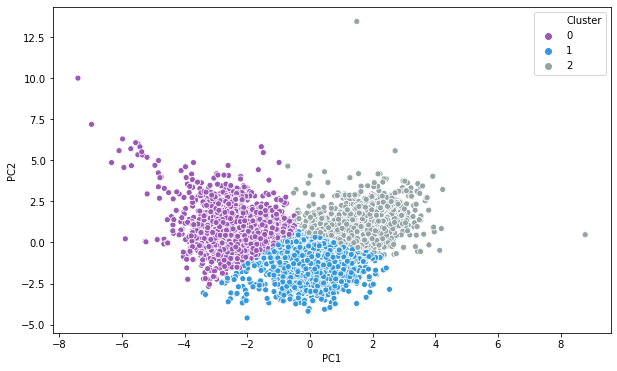

In [14]:
plt.figure(figsize = (10, 6))

_ = sns.scatterplot(x = "PC1", y = "PC2", hue = "Cluster", data = df_plot_km, palette = ["#9b59b6", "#3498db", "#95a5a6"])

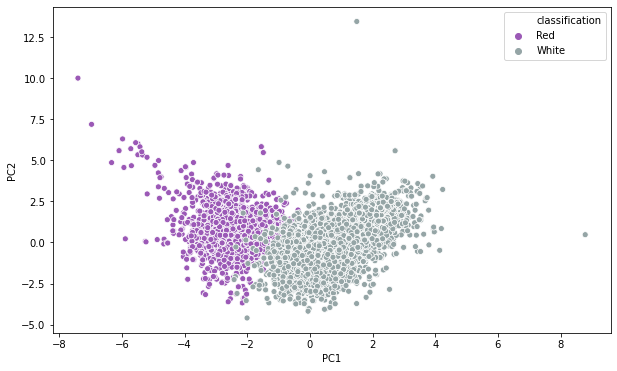

In [15]:
plt.figure(figsize = (10, 6))

_ = sns.scatterplot(x = "PC1", y = "PC2", hue = "classification", data = df_plot_km, palette = ["#9b59b6", "#95a5a6"])

In [16]:
df_centr_pcs = pd.concat([pd.DataFrame({"Cluster": [0, 1, 2]}), pd.DataFrame(kmeans.cluster_centers_, columns = ["Centroide_PC1", "Centroide_PC2"])], axis = 1)

df_centr_pcs

,Cluster,Centroide_PC1,Centroide_PC2
0,0,-2.507840,0.894661
1,1,0.235537,-1.307787
2,2,1.685775,1.264763


In [17]:
df_final = pd.merge(df_plot_km, df_centr_pcs, on = "Cluster")

df_final.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification,PC1,PC2,Cluster,Centroide_PC1,Centroide_PC2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,-3.205996,0.416523,0,-2.50784,0.894661
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,-3.039051,1.107462,0,-2.50784,0.894661
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,-3.071893,0.878964,0,-2.50784,0.894661
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,-1.571262,2.112545,0,-2.50784,0.894661
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,-3.205996,0.416523,0,-2.50784,0.894661


In [18]:
dist = pd.DataFrame(euclidean_distances(df_final[["PC1", "PC2"]], df_final[["Centroide_PC1", "Centroide_PC2"]]))[0]

df_final = pd.concat([df_final, dist], axis = 1).rename(columns = {0: "Dist"})

df_final

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification,PC1,PC2,Cluster,Centroide_PC1,Centroide_PC2,Dist
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5,Red,-3.205996,0.416523,0,-2.507840,0.894661,0.846190
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.80,5,Red,-3.039051,1.107462,0,-2.507840,0.894661,0.572249
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.80,5,Red,-3.071893,0.878964,0,-2.507840,0.894661,0.564271
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.80,6,Red,-1.571262,2.112545,0,-2.507840,0.894661,1.536365
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5,Red,-3.205996,0.416523,0,-2.507840,0.894661,0.846190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,5.0,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.40,6,White,1.727853,0.176175,2,1.685775,1.264763,4.296199
6493,6.5,0.330,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.60,5,White,2.149839,0.679634,2,1.685775,1.264763,4.662640
6494,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,6,White,2.087348,0.713604,2,1.685775,1.264763,4.598754
6495,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.40,6,White,1.746274,0.150229,2,1.685775,1.264763,4.318758


In [19]:
df_final.sort_values("Dist", ascending = False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification,PC1,PC2,Cluster,Centroide_PC1,Centroide_PC2,Dist
5816,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,White,1.497100,13.470094,2,1.685775,1.264763,13.197767
6453,6.1,0.260,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,White,8.786086,0.476708,2,1.685775,1.264763,11.301658
144,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,Red,-7.400314,10.017859,0,-2.507840,0.894661,10.352248
250,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5,Red,-6.966064,7.201997,0,-2.507840,0.894661,7.723874
5234,6.9,0.270,0.49,23.5,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5,White,3.922610,4.035485,2,1.685775,1.264763,7.156498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,8.4,0.635,0.36,2.0,0.089,15.0,55.0,0.99745,3.31,0.57,10.4,4,Red,-2.516216,1.004931,0,-2.507840,0.894661,0.110587
865,10.7,0.520,0.38,2.6,0.066,29.0,56.0,0.99577,3.15,0.79,12.1,7,Red,-2.414104,0.886163,0,-2.507840,0.894661,0.094121
1334,8.0,0.500,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7,6,Red,-2.452261,0.830768,0,-2.507840,0.894661,0.084685
1110,8.8,0.450,0.43,1.4,0.076,12.0,21.0,0.99551,3.21,0.75,10.2,6,Red,-2.563508,0.870650,0,-2.507840,0.894661,0.060626


- Aqui basicamente queremos ver como está distribuída nossa variável `Dist`

- A maioria dos valores se encontram entre 0 e 6

- O pico de valores, isto é, a maioria dos valores da distância euclidiana, se encontra no 4, indicando que a maioria dos valores da distância são de 4 unidades

- A partir do valor de 6 unidades a distância começa a ter poucos valores, indicando assim, que o valor de 7 unidades de distância começa a ser raro. Devido a isso, o ponto de corte será de 7

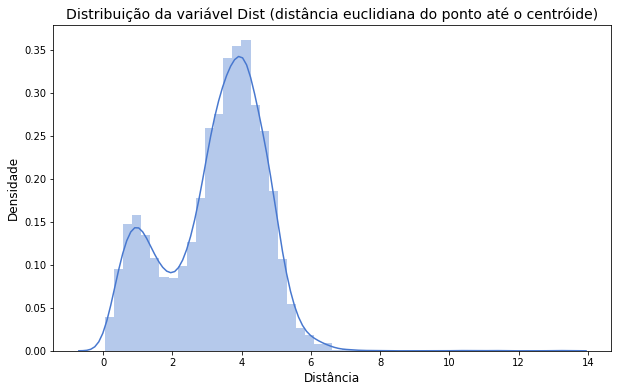

In [20]:
_ = plt.figure(figsize = (10, 6))

_ = sns.distplot(a = df_final["Dist"], hist = True)

_ = plt.title(label = "Distribuição da variável Dist (distância euclidiana do ponto até o centróide)", size = 14)
_ = plt.xlabel(xlabel = "Distância", size = 12)
_ = plt.ylabel(ylabel = "Densidade", size = 12)

In [21]:
th = 7

df_prob = df_final[df_final["Dist"] >= th]

f"O dataset possui {df_prob.shape[0]} observações e {df_prob.shape[1]} variáveis"

'O dataset possui 8 observações e 19 variáveis'

### 2.1. Comparando as observações problemáticas

- As observações problemática somam um total de 8;

- 6 destas observações estão no cluster 1 e 2 observações no cluster 0

In [22]:
df_prob["Cluster"].value_counts(ascending = True)

0    2
2    6
Name: Cluster, dtype: int64

- Utilizando somente as observações que consideramos problemáticas, ou seja, onde a distância euclidiana entre a PC1 e PC2 com os seus respectivos centróides de cada grupo foi maior que nosso o ponto de corte de 8 unidades de distância e comparando com a primeira tabela descritiva acima;

    - fixed acidity: apresentou valores medianos maiores 
    - volatile acidity: não apresentou mudanças
    - citric acid: o valor mediano do vinho **Red** aumentou de 0.26 para 0.88
    - residual sugar: apresentou o mesmo padrão
    - chlorides: o valor mediano do vinho **Red** aumento de 0.08 para 0.61
    - free sulfur dioxide: ambas os tipos de vinho apresentaram valores altos
    - total sulfur dioxide: não houve mudança de padrão
    - density: mudança de padrão relativamente pequena
    - pH: mudança de padrão, o tipo de vinho **White** apresentou maior valor mediano
    - sulphates: aumento no valor mediano do tipo **Red**
    - alcohol: mudança de padrão, o valor mediano do tipo **White** diminuiu

In [23]:
df_prob.drop(["quality", "PC1", "PC2", "Cluster", "Centroide_PC1", "Centroide_PC2", "Dist"], axis = 1).groupby("classification").aggregate(["median", "std"]).T.round(2)

classification                 Red   White
fixed acidity        median   8.45    7.65
                     std      1.06    0.72
volatile acidity     median   0.46    0.30
                     std      0.08    0.28
citric acid          median   0.88    0.32
                     std      0.17    0.14
residual sugar       median   2.60   27.55
                     std      1.13   21.00
chlorides            median   0.61    0.06
                     std      0.00    0.01
free sulfur dioxide  median  20.00   47.00
                     std     16.97  104.64
total sulfur dioxide median  57.00  194.00
                     std     16.97  105.00
density              median   1.00    1.01
                     std      0.00    0.02
pH                   median   2.90    3.27
                     std      0.23    0.19
sulphates            median   1.63    0.45
                     std      0.52    0.13
alcohol              median   9.40    8.85
                     std      0.00    1.26

#### 2.1.1. Focando no grupo 0 de cluster

- Quando comparamos com o dataframe que não possui informações problemáticas, temos:

    - residual sugar: alta variação de valores em relação a mediana
    - free sulfur dioxide: alta variação de valores em relação a mediana
    - total sulfur dioxide: valores altíssimos em relação a mediana

In [24]:
#--- Dataframe problemático

df_prob[df_prob["Cluster"] == 0].round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification,PC1,PC2,Cluster,Centroide_PC1,Centroide_PC2,Dist
144,9.2,0.52,1.00,3.4,0.610,32.0,69.0,1.000,2.74,2.00,9.4,4,Red,-7.400,10.018,0,-2.508,0.895,10.352
250,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.997,3.06,1.26,9.4,5,Red,-6.966,7.202,0,-2.508,0.895,7.724


In [25]:
#--- Mediana das características com grupo 0

df1 = df_final.drop(list(df_prob.index), axis = 0)

df1[df1["Cluster"] == 0].drop("Cluster", axis = 1).aggregate(["median"]).round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2,Centroide_PC1,Centroide_PC2,Dist
median,8.0,0.52,0.26,2.2,0.08,13.0,38.0,0.997,3.3,0.62,10.1,6.0,-2.526,0.736,-2.508,0.895,1.138


#### 2.1.2. Focando no grupo 2 de cluster

- Quando comparamos com o dataframe que não possui informações problemáticas, temos

    - **chlorides**: apresentou valores altos
    - **total sulfur dioxide**: valores baixos
    - **ph**: valores baixos
    - **sulphates**: valores altos

In [26]:
#--- Dataframe problemático

df_prob[df_prob["Cluster"] == 2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification,PC1,PC2,Cluster,Centroide_PC1,Centroide_PC2,Dist
5234,6.9,0.270,0.49,23.5,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5,White,3.922610,4.035485,2,1.685775,1.264763,7.156498
5258,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,White,2.720376,5.590229,2,1.685775,1.264763,7.027276
5265,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,White,2.720376,5.590229,2,1.685775,1.264763,7.027276
5607,7.5,0.230,0.35,17.8,0.058,128.0,212.0,1.00241,3.44,0.43,8.9,5,White,4.238425,3.231324,2,1.685775,1.264763,7.139474
5816,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,White,1.497100,13.470094,2,1.685775,1.264763,13.197767
6453,6.1,0.260,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,White,8.786086,0.476708,2,1.685775,1.264763,11.301658


In [27]:
#--- Mediana das características com grupo 0

df1 = df_final.drop(list(df_prob.index), axis = 0)

df1[df1["Cluster"] == 2].drop("Cluster", axis = 1).aggregate(["median"]).round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2,Centroide_PC1,Centroide_PC2,Dist
median,6.9,0.26,0.34,10.9,0.05,45.0,168.0,1.0,3.14,0.48,9.4,6.0,1.73,1.14,1.69,1.26,4.33


## 3. Pré-processamento

### 3.2. Funções

In [32]:
def qcut_categ(df, var_list, quartis, exclude = True):
    
    """
    Função para criar categorizar uma variável quantitativa
    a partir dos seus quartis, escolhidos pelo usuário
    ------------
    Parâmetros:
    ------------
    df: DataFrame do pandas;
    var_list: Lista de variáveis que serão categorizada;
    quartis: Número de quartis e classes que irão ser categorizadas;
    exclude:
            True (default): Exclui as variáveis origiinais da lista,
            mantendo as novas
            
            False: Adiciona novas variáveis com o prefixo "_new" a elas
            no df
    ------
    Saída:
    ------
    df: dataframe com as variáveis já transformadas
    """
    
    df = df.copy()
        
    if exclude == False:
        
        string = "_cat_quantile"
        var_list1 = [s + string for s in var_list]
        
        df[var_list1] = df[var_list].apply(lambda x: pd.qcut(x, q = quartis, labels = list(range(quartis))))
        
        return(df)
    
    else: 
               
        df[var_list] = df[var_list].apply(lambda x: pd.qcut(x, q = quartis, labels = list(range(quartis))))
        
        return(df)

In [33]:
qcut_categ(df = banco, var_list = ["residual sugar", "free sulfur dioxide", "total sulfur dioxide"], quartis = 4, exclude = False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification,residual sugar_cat_quantile,free sulfur dioxide_cat_quantile,total sulfur dioxide_cat_quantile
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red,1,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red,1,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White,0,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White,2,3,3
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White,0,2,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White,0,1,1


In [30]:
banco

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


# Próximos passos

1. Fazer a verificação por grupo